In [26]:
# Install dependencies (if not already installed)
!pip install boto3 pandas
!pip install imbalanced-learn

In [5]:
# Import required libraries
import boto3
import pandas as pd
from io import StringIO

In [6]:
# Define S3 bucket and file path
s3_bucket = "kaggle-churn-data"  # Replace with your bucket name if different
s3_file_path = "cleaned_data_final.csv"  # Path in S3

# Create an S3 client
s3 = boto3.client("s3")

# Fetch the CSV file from S3
obj = s3.get_object(Bucket=s3_bucket, Key=s3_file_path)

# Read it into a Pandas DataFrame
df = pd.read_csv(obj["Body"])

# Display dataset information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   int64  
 4   dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int64  
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   int64  


In [8]:
print(df.dtypes)

customerid           object
gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object


In [9]:
print(df.describe())

       seniorcitizen      partner   dependents       tenure  phoneservice  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       paperlessbilling  monthlycharges  totalcharges        churn  
count       7043.000000     7043.000000   7043.000000  7043.000000  
mean           0.592219       64.761692   2279.734304     0.265370  
std            0.491457       30.090047   2266.794470     0.441561  
min            0.000000       

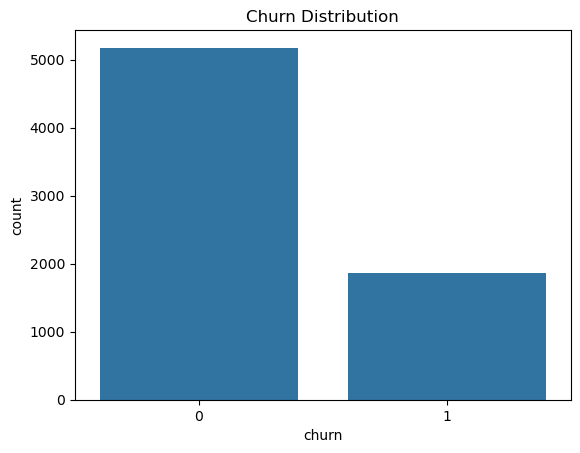

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

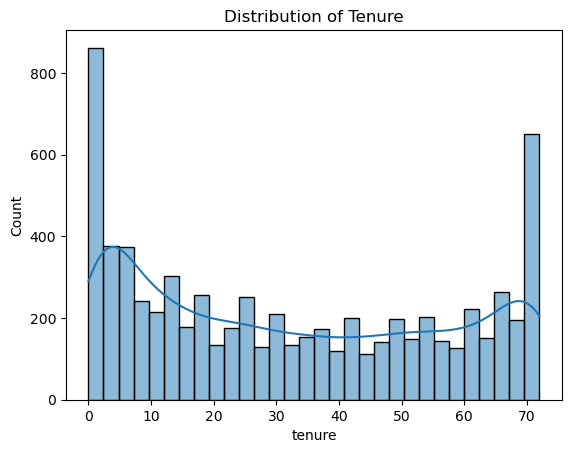

In [11]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ["tenure", "monthlycharges", "totalcharges"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop("churn", axis=1)  # Features
y = df["churn"]  # Target (Churn: 1 or 0)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)

Training Data: (5634, 20) (5634,)
Testing Data: (1409, 20) (1409,)


In [17]:
print(X_train.dtypes)

customerid           object
gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure              float64
phoneservice          int64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object


In [18]:
X_train = X_train.drop(columns=["customerid"], errors="ignore")
X_test = X_test.drop(columns=["customerid"], errors="ignore")

In [20]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Show detailed classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8219
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7906
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("New class distribution:", y_train_smote.value_counts())

# Train Logistic Regression again
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = model_smote.predict(X_test)

# Evaluate new model
print(f"SMOTE Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

New class distribution: churn
0    4138
1    4138
Name: count, dtype: int64
SMOTE Logistic Regression Accuracy: 0.7580
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/opt/conda/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:42:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7949
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [30]:
import joblib

# Save the trained model as a .pkl file
joblib.dump(model_smote, "churn_prediction_model.pkl")

['churn_prediction_model.pkl']

In [31]:
import boto3

# Define S3 bucket and file path
s3_bucket = "kaggle-churn-data"  # Change to your bucket name
s3_model_path = "models/churn_prediction_model.pkl"

# Upload model to S3
s3 = boto3.client("s3")
s3.upload_file("churn_prediction_model.pkl", s3_bucket, s3_model_path)

print(f"Model uploaded to s3://{s3_bucket}/{s3_model_path}")

Model uploaded to s3://kaggle-churn-data/models/churn_prediction_model.pkl


In [32]:
import numpy as np

# Get feature importance
feature_importance = abs(model_smote.coef_[0])
features = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

print("Top Features Influencing Churn:")
for idx in sorted_idx[:10]:  # Show top 10 features
    print(f"{features[idx]}: {feature_importance[idx]:.4f}")

Top Features Influencing Churn:
monthlycharges: 10.2871
tenure: 3.8546
internetservice_Fiber optic: 3.4606
totalcharges: 1.7138
streamingmovies_Yes: 1.3997
streamingtv_Yes: 1.2337
phoneservice: 1.1391
contract_Two year: 1.1074
multiplelines_Yes: 0.9170
paymentmethod_Electronic check: 0.8037


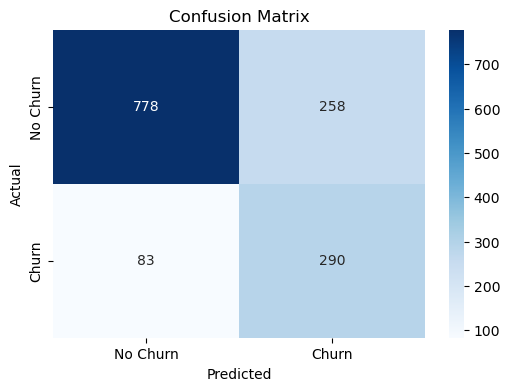

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()